<a href="https://colab.research.google.com/github/sksos7/2020_03_01_Hollys/blob/master/ai_sc11x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS SC11x

## Data Preprocessing & Exploratory Data Analysis

## Data Preprocessing

이번 파트에서는 [Gapminder](https://www.gapminder.org/about-gapminder/)의 데이터를 다루게 됩니다.

데이터는 3가지로 구성되어 있으며 description은 다음과 같습니다.

- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv>
- <https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv>

### data1

|geo|time|cell_phones_total|
|:-:|:-:|:-:|
|kor|2017|63658688|
|kor|2018|66355778|
|kor|2019|68892541|

- 지역, 연도, 통화수

### data2

|geo|time|population|
|:-:|:-:|:-:|
|kor|2017|51096415|
|kor|2018|51171706|
|kor|2019|51225308|

- 지역, 연도, 인구수

### data3

|geo|country|
|:-:|:-:|
|kor|South Korea|

- 지역, 나라 이름

### 1. Load and Explore the Data

- 데이터셋을 데이터프레임으로 불러오세요.
- 결측데이터를 확인하세요.
- `time` vs `cell_phones_total`에 대해서 `scatter plot`을 그리세요.


In [286]:
import pandas as pd

# 각 데이터의 url
url_data_1 = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data1.csv'
url_data_2 = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data2.csv'
url_data_3 = 'https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/gapminder/data3.csv'

# 데이터프레임 불러오기
df1 = pd.read_csv(url_data_1)
df2 = pd.read_csv(url_data_2)
df3 = pd.read_csv(url_data_3)

# 첫 열 제거
df1 = df1.drop(['Unnamed: 0'],axis=1)
df2 = df2.drop(['Unnamed: 0'],axis=1)
df3 = df3.drop(['Unnamed: 0'],axis=1)

In [287]:
# 결측데이터 확인
# .isna() 결과가 True 일 경우 .sum() 함수 사용시 +1
print(df1.isna().sum())
print(df2.isna().sum())
print(df3.isna().sum())

geo                  0
time                 0
cell_phones_total    0
dtype: int64
geo           0
time          0
population    0
dtype: int64
geo        0
country    0
dtype: int64


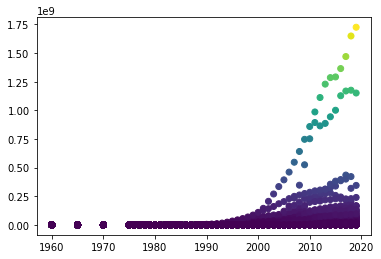

In [288]:
import matplotlib.pyplot as plt
from pandas import DataFrame
from pandas import Series

# time vs cell_phones_total에 대해서 scatter plot
# 매개변수 c는 기준에 따른 색변화
plt.scatter(df1['time'],df1['cell_phones_total'],c=df1['cell_phones_total'])

### 2. Join data

다음 데이터를 만드세요. (shape = 9568 * 5)

|geo|time|cell_phones_total|population|country|
|:-:|:-:|:-:|:-:|:-:|
|abw|1960|0|54211|Aruba|
|...|...|...|...|...|
|zwe|2019|13195902.0|14645468|Zimbabwe|


In [289]:
# d1, d2의 'population', d3를 합쳐야함
df4 = pd.merge(df1,df2)
df4 = pd.merge(df4,df3)
print(df4.shape)
df4

(9568, 5)


,geo,time,cell_phones_total,population,country
0,abw,1960,0.0,54211,Aruba
1,abw,1965,0.0,57360,Aruba
2,abw,1970,0.0,59063,Aruba
3,abw,1975,0.0,60657,Aruba
4,abw,1976,0.0,60586,Aruba
...,...,...,...,...,...
9563,zwe,2015,12757410.0,13814629,Zimbabwe
9564,zwe,2016,12878926.0,14030331,Zimbabwe
9565,zwe,2017,14092104.0,14236595,Zimbabwe
9566,zwe,2018,12908992.0,14438802,Zimbabwe


### 3. Feature Engineering

인구당 cell phone의 수를 표기한 `PPP`라는 feature를 추가하세요. 

그 결과로 2019년 한국에서 PPP가 1.3448이 나와야 합니다. (해당 내역을 보여주세요.)

In [290]:
# 인구당 cell phone의 수를 표기한 PPP
# PPP = cell_phones_total/population
df4['PPP'] = df4['cell_phones_total']/df4['population']

# 2019년 한국에서 PPP가 1.3448이 나와야 합니다
# time의 타입은 문자열이 아니기 때문에 '2019' 로 검색하면 x
df4[ (df4['geo'] == 'kor') & (df4['time'] == 2019)]

,geo,time,cell_phones_total,population,country,PPP
4805,kor,2019,68892541.0,51225308,South Korea,1.344893


### 4. Data Manipulation

각 나라별로 평균 PPP를 계산하세요.

In [291]:
# 각 나라별로 평균 PPP를 계산
df5 = df4.groupby('geo').mean()
df5 = df5[['PPP']]
df5 = df5.reset_index()
df5

,geo,PPP
0,abw,0.384005
1,afg,0.133398
2,ago,0.124074
3,alb,0.324242
4,and,0.347083
...,...,...
208,wsm,0.121033
209,yem,0.136329
210,zaf,0.422318
211,zmb,0.173231


가장 많은 PPP 값을 갖는 top 10 country 를 구하세요.

다음과 비슷한 결과가 나와야 합니다. 

|country|PPP|
|:-:|:-:|
|are|0.741916|
|sau|0.757034|
|lie|0.806225|
|hkg|0.810664|
|mac|0.818130|
|isr|0.840197|
|srb|0.951586|
|nld_curacao|1.259227|
|mne|1.574349|
|sxm|1.899506|


In [292]:
# 가장 많은 PPP 값을 갖는 top 10 country
df6 = df5.sort_values(by=['PPP'], axis=0, ascending=True)
df6 = df6.iloc[-10:,:]
df6 = df6.reset_index(drop=True)
df6

,geo,PPP
0,are,0.741916
1,sau,0.757034
2,lie,0.806225
3,hkg,0.810664
4,mac,0.818130
5,isr,0.840197
6,srb,0.951586
7,nld_curacao,1.259227
8,mne,1.574349
9,sxm,1.899506


## EDA
이번 파트에서는 **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)** 의 데이터를 다루게 됩니다.


아래의 코드는 이미 여러분들을 위해 준비되어 있습니다. 아래 cell 을 실행하면 자동으로 data 가 load 되며, `df`라는 이름의 dataframe 을 얻게 될 겁니다. 

(원하신다면 추가 EDA를 하셔도 상관없지만, 이번 파트에서의 요구사항은 아닙니다.)


In [293]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

cable_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/cable_weekly.csv'
online_news_url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/media-mentions-2020/online_weekly.csv'

cable = pd.read_csv(cable_news_url)
online = pd.read_csv(online_news_url)

merged = pd.merge(cable[['date', 'name', 'pct_of_all_candidate_clips']], online[['date', 'name', 'pct_of_all_candidate_stories']])
merged['date'] = pd.to_datetime(merged['date'], infer_datetime_format=True)
merged = merged.set_index('date')

unique_dates = list(set(merged.index.to_list()))

import datetime

joe_biden_cable_multiple = []
joe_biden_online_multiple = []

for date in unique_dates:
  #that_day = merged.loc[datetime.date(year=date.year, month=date.month, day=date.day)]
  str_date = str(date.year)+"-"+str(date.month) + "-" + str(date.day)
  that_day = merged.loc[str_date]

  joe_biden_cable_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_clips']
  not_joe_biden_cable_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_clips'].max()
  joe_biden_cable_multiple_of_max = joe_biden_cable_that_day / not_joe_biden_cable_max

  joe_biden_online_that_day = that_day[that_day['name']=="Joe Biden"]['pct_of_all_candidate_stories']
  not_joe_biden_online_max = that_day[that_day['name']!="Joe Biden"]['pct_of_all_candidate_stories'].max()
  joe_biden_online_multiple_of_max = joe_biden_online_that_day / not_joe_biden_online_max


  joe_biden_cable_multiple.append(joe_biden_cable_multiple_of_max.values[0])
  joe_biden_online_multiple.append(joe_biden_online_multiple_of_max.values[0])

df = pd.DataFrame({'date': unique_dates, 'biden_cable_multiple':joe_biden_cable_multiple, 'biden_online_multiple': joe_biden_online_multiple})
df = df.set_index('date')
df = df.sort_index()

data_for_graph = df.loc[datetime.date(2019, 4, 15):]
print(data_for_graph.shape)
data_for_graph.head()

(27, 2)


,biden_cable_multiple,biden_online_multiple
date,,
2019-04-21,3.087352,1.107492
2019-04-28,3.707641,1.295820
2019-05-05,2.805169,1.306122
2019-05-12,3.235849,1.045386
2019-05-19,2.494624,1.119588


아래의 그림을 따라 그리세요 :

<img src='https://fivethirtyeight.com/wp-content/uploads/2019/10/Mehta-Media1028-1028-1.png' width = 500>



여러분들이 새로 만들게 될 plot은 다음을 만족해야 합니다:
- `example`과 유사한 `Cable News` vs `Online News` 2개의 line graph가 보여야 합니다. 
- 각 라인은 각각 **다른** 색깔을 가져야 합니다. (위 `example` 과 반드시 같은 색일 필요는 없습니다)
- 타이틀을 다음 내용으로 만드세요. _"Biden's Ukraine-related media bump is fading"_


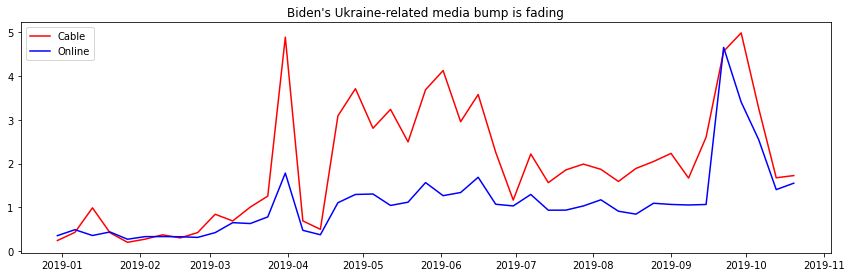

In [294]:
# date가 y 좌표가 되도록 설정
# 인덱스를 초기화해주면서 date를 컬럼에 넣기
# cable은 레드, online은 블루, 각각 라벨은 자기 이름
# .legend 로 왼쪽 위에 라벨 표시
df_graph = df.reset_index()
plt.plot(df_graph['date'],df_graph['biden_cable_multiple'] ,'r', label='Cable')
plt.plot(df_graph['date'],df_graph['biden_online_multiple'],'b', label='Online')
plt.title("Biden's Ukraine-related media bump is fading")
plt.legend(loc='upper left')

# 그래프 크기, 좌우간격 등등 설정
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

## SC 3점 요구사항:

위에서 요구된 사항들을 모두 정확하게 만족하였으며, 아직 시간이 남았다면 아래 2개의 내용들중 하나를 만족하는 경우 3점을 얻을 수 있습니다. 

아래 요구사항들은 모두 **optional** 임을 다시 한 번 강조합니다. (필수 요구사항이 아닙니다.)

## 1. Data Preprocessing

- `cell_phones`dataframe 에서 필터를 걸어 USA 와 china 정보만 담게 하고, scatter plot 을 다시 그려 보세요. 

- geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요. 

- 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다. 
미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?

## 2. EDA

- 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요. 


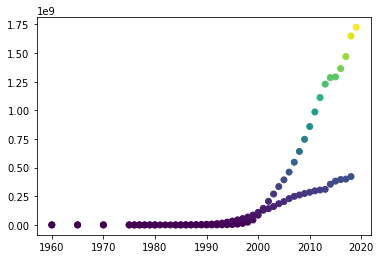

In [295]:
# 1. Data Preprocessing
# 데이터시트 찾아보니 USA는 소문자로 usa
# 구글링으로 국가별 알파벳 국가코드 찾아보니 china는 chn
# 필터를 걸어 USA 와 china 정보만 담게 하고
condition = (df4['geo'] == 'usa') | (df4['geo'] == 'chn')
df7 = df4[condition].copy()

# scatter plot 을 다시 그려 보세요
plt.scatter(df7['time'],df7['cell_phones_total'],c=df7['cell_phones_total'])

In [296]:
# geo code 를 lowercase가 아닌 uppercase 로 바꿔보세요.
# string.upper

# 두 코드 모두 동일한 동작을 함.
# map() -> series , applymap() -> dataframe
# df7['geo'] = df7['geo'].map(str.upper)
# 도중에 경고가 떠서 위 코드에서 df7 = df4[~].copy() 를 사용함
df7[['geo']] = df7[['geo']].applymap(str.upper)
df7[['geo']]

,geo
1627,CHN
1628,CHN
1629,CHN
1630,CHN
1631,CHN
...,...
9033,USA
9034,USA
9035,USA
9036,USA


In [297]:
# 2017년은 China가 people(인구수)보다 cell phone 개수가 더 많아지는 첫번째 년도 입니다.
# 미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는 언제인가요?
condition = (df7['geo']=='USA') & (df7['cell_phones_total']>df7['population'])
print("미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는? : ",df7[condition].iloc[0,1])
df7[condition]

미국의 경우, cell phone의 개수가 people 보다 더 많아지는 첫번째 년도는? :  2014


,geo,time,cell_phones_total,population,country,PPP
9033,USA,2014,355500000.0,318673411,United States,1.115562
9034,USA,2015,382307000.0,320878310,United States,1.191439
9035,USA,2016,396000000.0,323015995,United States,1.225945
9036,USA,2017,400000000.0,325084756,United States,1.230448
9037,USA,2018,422000000.0,327096265,United States,1.290140


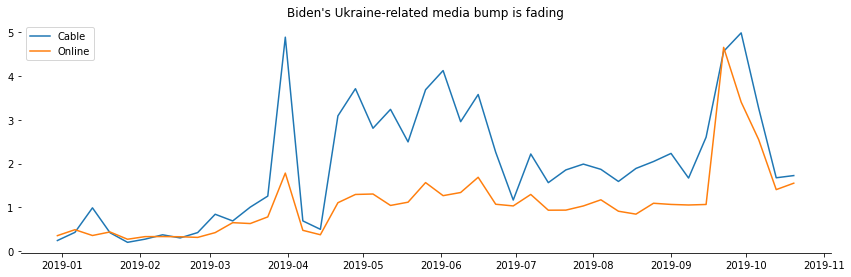

In [298]:
# 2. EDA
# 주어진 fivethirtyeight 그림 차트와 완벽히 동일하게 그려보세요.

# date가 y 좌표가 되도록 설정
# 인덱스를 초기화해주면서 date를 컬럼에 넣기
# cable은 레드, online은 블루, 각각 라벨은 자기 이름
# .legend 로 왼쪽 위에 라벨 표시
df_graph = df.reset_index()
plt.plot(df_graph['date'],df_graph['biden_cable_multiple'] , label='Cable' )
plt.plot(df_graph['date'],df_graph['biden_online_multiple'], label='Online')
plt.title("Biden's Ukraine-related media bump is fading")
plt.legend(loc='upper left')

# 그래프 크기, 좌우간격 등등 설정
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=2, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

# 테두리 지우기
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)